## File Contains Datasets:

* Facial Atrribute:
 - Hair              ('Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Gray_Hair', 'Receding_Hairline', 'Straight_Hair', 'Wavy_Hair', 'Bald', 'Bangs')
 - Facial Hair       ('Mustache', 'No_Beard',  'Sideburns', 'Arched_Eyebrows','Bushy_Eyebrows', 'Goatee')
 - Facial properties ('Oval_Face', 'Pale_Skin', 'Pointy_Nose',  'Rosy_Cheeks',  'Attractive', 'Bags_Under_Eyes', 'Big_Lips', 'Big_Nose', 'Chubby', 'Double_Chin', 'High_Cheekbones', 'Mouth_Slightly_Open', Narrow_Eyes',
 - Emotions          ('Smiling',
 - Accessories       ('Eyeglasses', 'Wearing_Necklace', 'Wearing_Necktie', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Heavy_Makeup')


* Sex ('Male', 'Female')

* Race ('Asian', 'Black', 'Indian', 'Latino', 'White')

* Age ('Adult', 'Child', 'Old', 'Young', 'Teenager')

* Other ('Shadow', 'Blurry')

#### Image Augmantation (Flip, Rotate, Blur, Sharpen, 
#### Code for df managment and labels summary in csv file
#### files managment 

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shutil 
import cv2
import os
import sys
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
np.set_printoptions(precision=2)
# pd.options.display.max_seq_items = 20
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten

# Facial Attributes

http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html
### Agreement
The CelebA dataset is available for non-commercial research purposes only.
All images of the CelebA dataset are obtained from the Internet which are not property of MMLAB, The Chinese University of Hong Kong. The MMLAB is not responsible for the content nor the meaning of these images.
You agree not to reproduce, duplicate, copy, sell, trade, resell or exploit for any commercial purposes, any portion of the images and any portion of derived data.
You agree not to further copy, publish or distribute any portion of the CelebA dataset. Except, for internal use at a single site within the same organization it is allowed to make copies of the dataset.
The MMLAB reserves the right to terminate your access to the CelebA dataset at any time.
The face identities are released upon request for research purposes only. Please contact us for details.

#### Constants

In [3]:
def find_imagepath(file):
    temp_file = int(file.split('.')[0][-6:])
    if temp_file <= 70000:
        IMAGEPATH = 'Datasets/face_att/1/'
    elif temp_file > 70000 and temp_file < 140000:
        IMAGEPATH = 'Datasets/face_att/2/'
    elif temp_file >= 140000:
        IMAGEPATH = 'Datasets/face_att/3/'
    else:
        IMAGEPATH = 'Datasets/face_att/'
    return os.path.join(IMAGEPATH, file)

In [4]:
CELEB_DS = 'https://drive.google.com/file/d/0B7EVK8r0v71pblRyaVFSWGxPY0U/view?usp=sharing'

In [9]:
FILEPATH = '/Users/tal/Google Drive/Cellebrite/files list.csv'
try:
    IMAGEPATH = 'Datasets/face_att/'
except:
    IMAGEPATH = find_imagepath(file)

#### Reading Data

In [10]:
df = pd.read_csv(FILEPATH)
df_origin = df.copy()

In [11]:
df.columns.tolist()

['Unnamed: 0',
 '0_5_o_Clock_Shadow',
 '0_Arched_Eyebrows',
 '0_Attractive',
 '0_Bags_Under_Eyes',
 '0_Bald',
 '0_Bangs',
 '0_Big_Lips',
 '0_Big_Nose',
 '0_Black_Hair',
 '0_Blond_Hair',
 '0_Blurry',
 '0_Brown_Hair',
 '0_Bushy_Eyebrows',
 '0_Chubby',
 '0_Double_Chin',
 '0_Eyeglasses',
 '0_Goatee',
 '0_Gray_Hair',
 '0_Heavy_Makeup',
 '0_High_Cheekbones',
 '0_Male',
 '0_Mouth_Slightly_Open',
 '0_Mustache',
 '0_Narrow_Eyes',
 '0_No_Beard',
 '0_Oval_Face',
 '0_Pale_Skin',
 '0_Pointy_Nose',
 '0_Receding_Hairline',
 '0_Rosy_Cheeks',
 '0_Sideburns',
 '0_Smiling',
 '0_Straight_Hair',
 '0_Wavy_Hair',
 '0_Wearing_Earrings',
 '0_Wearing_Hat',
 '0_Wearing_Lipstick',
 '0_Wearing_Necklace',
 '0_Wearing_Necktie',
 '0_Young',
 '5_o_Clock_Shadow',
 'Adult',
 'Arched_Eyebrows',
 'Asian',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Child',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'G

#### Counting Nulls

In [41]:
df.isnull().sum().sum()

0

In [42]:
filenames = df.index.tolist()
print(f'Number of Images:\t{df.shape[0]}')
print(f'Number of Facial att.:\t{df.shape[1]}')

Number of Images:	202599
Number of Facial att.:	40


In [43]:
cols = df.columns.tolist()

In [44]:
df.replace(-1,0, inplace=True)
df.tail()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
face_att_202595.jpg,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
face_att_202596.jpg,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
face_att_202597.jpg,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
face_att_202598.jpg,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1
face_att_202599.jpg,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1


In [45]:
def zero_labeler(df):
    """
    funtion takes dataframe and add corresponding 0 label for every feature 
    """
    cols = df.columns.tolist()
    for col in cols:
        zero_col = '0_' + col
        df[zero_col] = np.where(df[col] == 0, 1, 0)
zero_labeler(df)

Total Labeled Images:	8103960



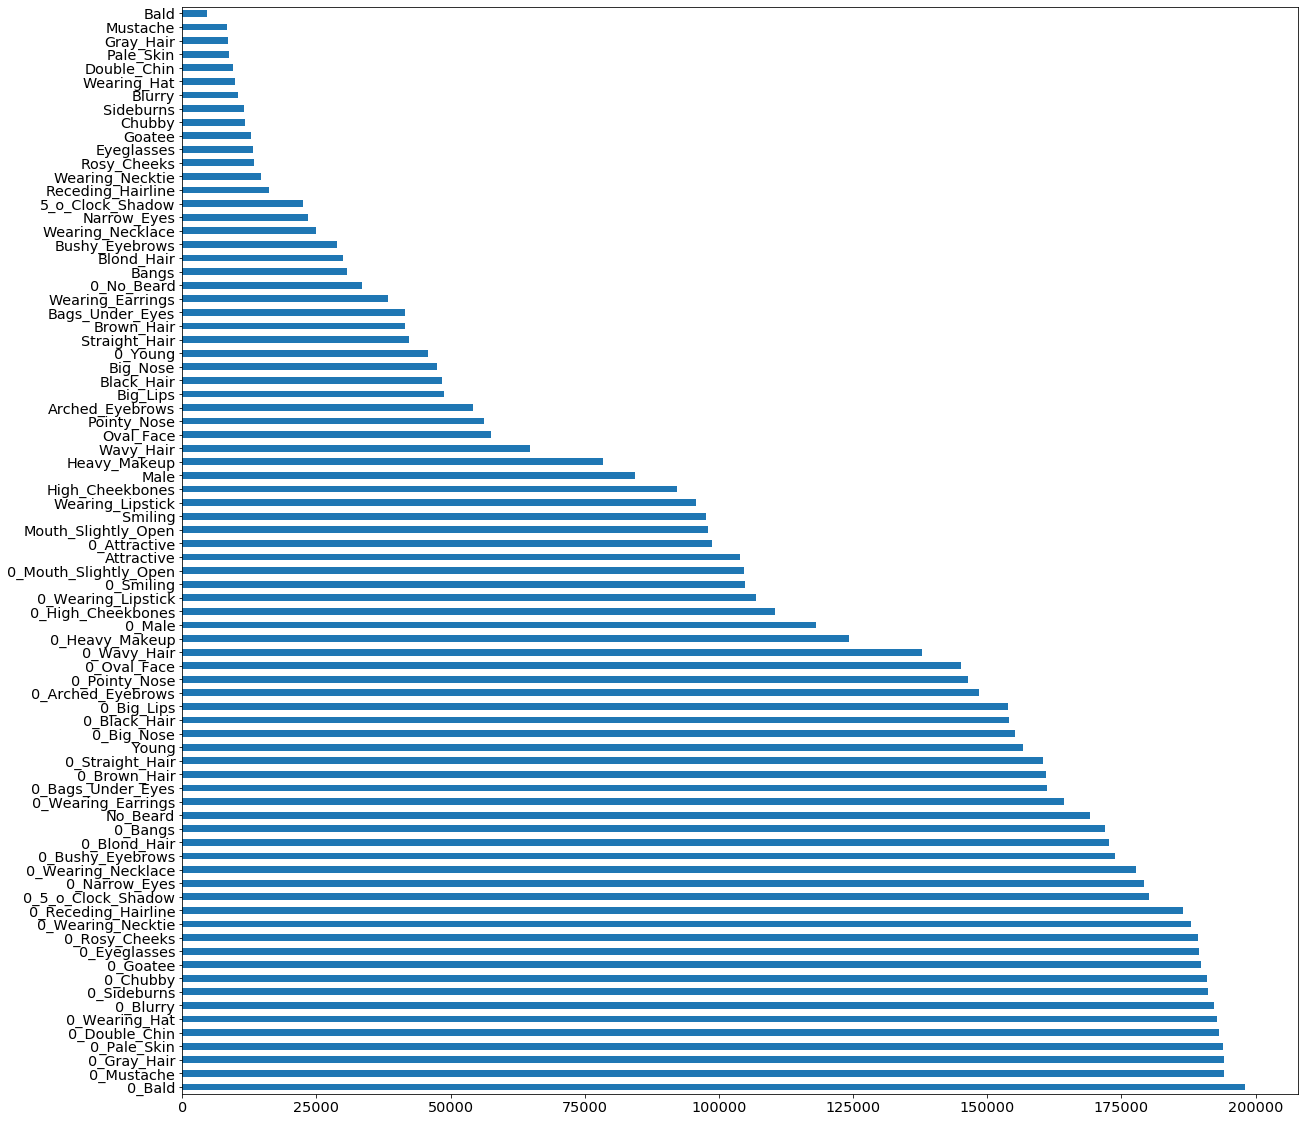

In [46]:
def labels_counter(df, size=20):
    count = df.sum().sort_values(ascending=False)
    print(f'Total Labeled Images:\t{count.sum()}\n')
    pd.DataFrame(count).plot(figsize=(size,size), kind='barh', legend=False)
labels_counter(df);

In [95]:
def plot_labels(df, path, label=None):
    """
    Function takes labeld df and present random image for each label
    if label argument provide than few random images of the same label aer shown
    params: df = dataframe with 1 and 0
            path = for the images folder
            label = name of the label to show (verified by the name of columns)
    returns: images plot
    """
    
    # verification 
    try:
        assert (df.dtypes != 'O').all()
    except AssertionError:
        print("Please Check Data Frame Labeled correctly with 0 and 1")
        
    if label != None and label not in df.columns.tolist():
        raise Exception(f'Error:\tWrong Label Used or not found in dataframe')
        sys.exit()  
        
#     pre = [folder for folder in path.split('/') if folder][-1]
    
    # Present Images for One Label
    if label != None:
        plt.figure(figsize=(10,10))
        for i in range(1, 21):
            plt.subplot(5,4, i)
            img = df[label].index[np.random.choice(*np.where(df[label] == 1))]
            image = cv2.imread(find_imagepath(img))
            img = cv2.cvtColor(image, cv2.cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            plt.xticks([])
            plt.yticks([])
            plt.suptitle(label)
        plt.show();    
        return
    
    # Present Random Multi_Label Images
    i = 1
    plt.figure(figsize=(25,25))
    cols = df.columns.tolist()
    ncols = [8 if len(cols)%8 == 0 else 3]
    shape = np.array(cols).reshape(-1, *ncols)
    
    for c in cols:
        stop = False
        plt.subplot(shape.shape[0], shape.shape[1],i)
        while not stop:
            
            try:                
                img = df[c].index[np.random.choice(*np.where(df[c] == 1))]
                image = cv2.imread(find_imagepath(img))
                img = cv2.cvtColor(image, cv2.cv2.COLOR_BGR2RGB)
                plt.imshow(img)
                stop = True
            except Exception as e:
                print(f'Error: {e} with file: {img}')
                break
    
        plt.title(c)
        plt.xticks([])
        plt.yticks([])
        i+=1

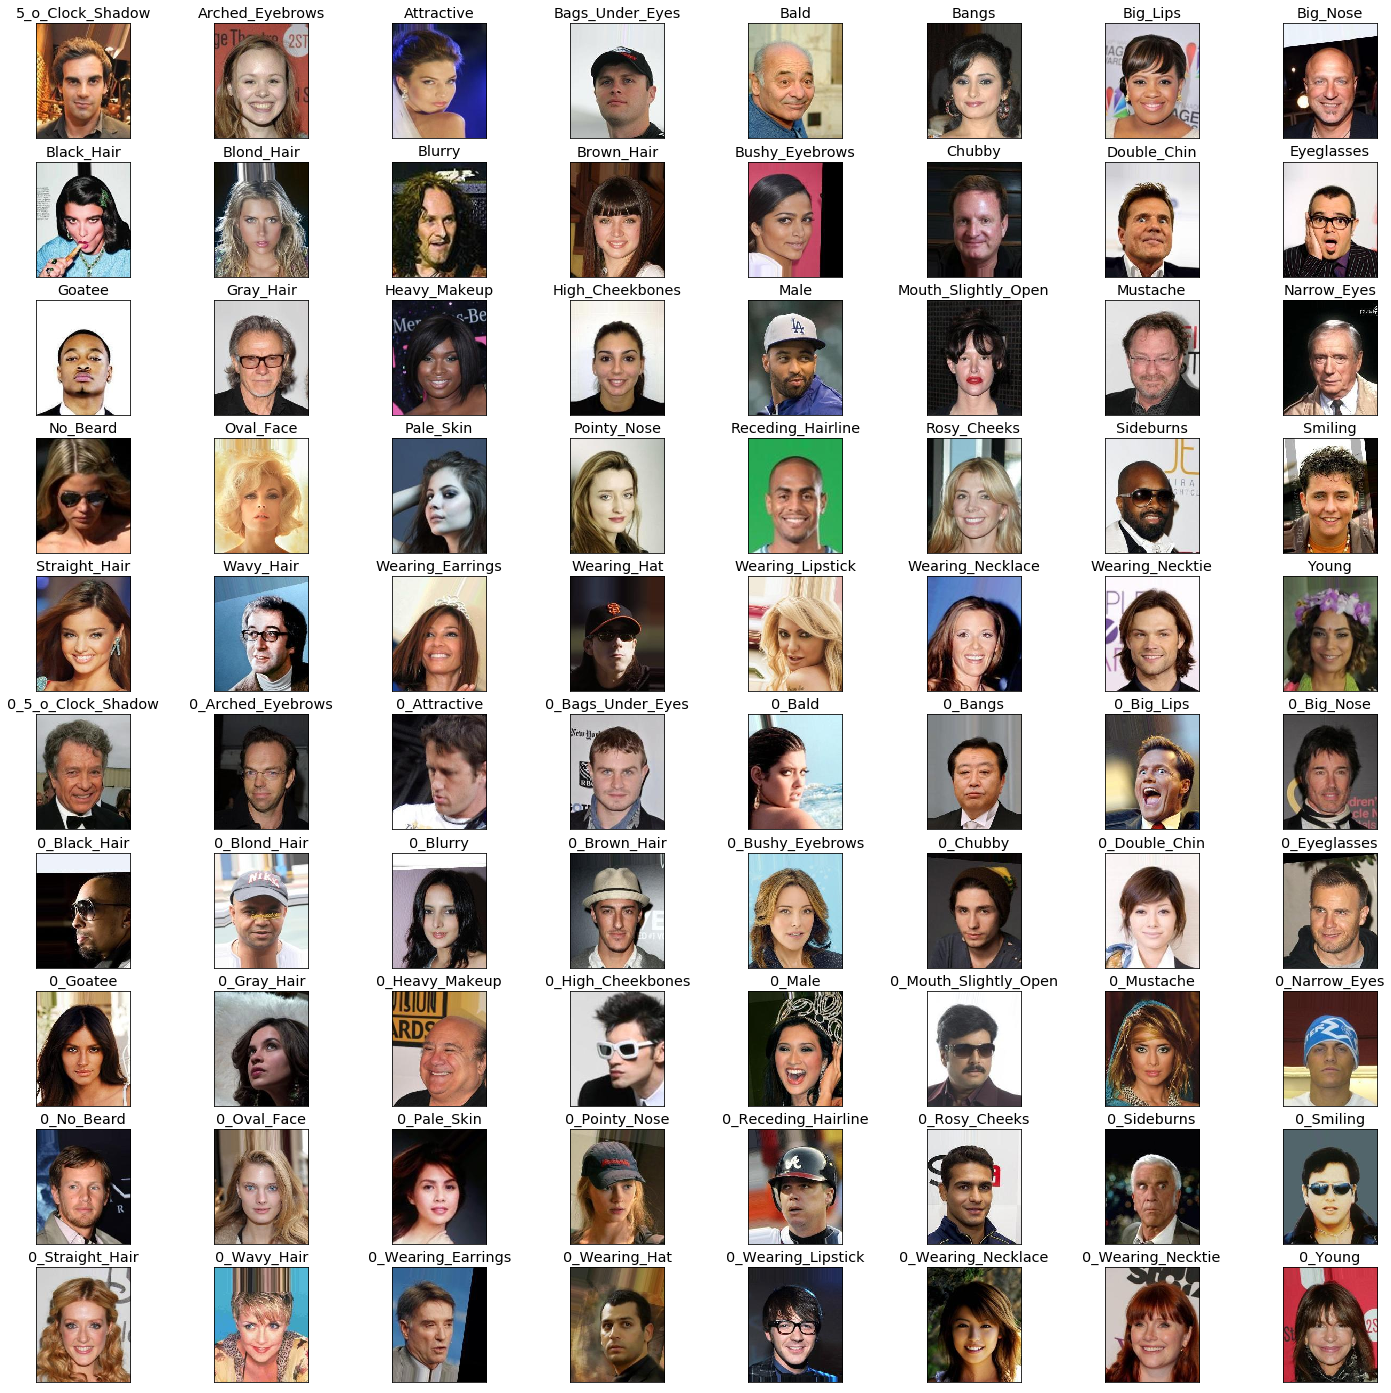

In [96]:
plot_labels(df, IMAGEPATH)

# Age - Sex - Race
##### split datasets to races of different age and sex

License Claim
The UTKFace dataset is avaiable for non-commercial research purposes only.
The aligned and cropped images, as well as landmarks, are obtained by Dlib.
Please note that all the images are collected from the Internet which are not property of AICIP. AICIP is not responsible for the content nor the meaning of these images.
The copyright belongs to the original owners. If any of the images belongs to you, please let us know and we will remove it from our dataset immediately.
The ground truth of age, gender and race are estimated through the DEX algorithm and double checked by a human annotator. If you find anything inaccurate, please let us know.


In [97]:
AGE = -4
SEX = -3
RACE = -2
IMAGEPATH2 = '/Users/tal/Downloads/Databases/age_sex_race/'

In [107]:
filenames = os.listdir(IMAGEPATH2)
files_num = len(filenames)

In [134]:
rage_df = pd.DataFrame(index=filenames, columns=['Female', 'Male', 'White', 'Black', 'Asian', 'Indian', 'Latino', 'Child', 'Teenager', 'Adult', 'Old']).fillna(0)

In [154]:
def df_tagger(df):
    """
    function iterate each row index name and tag 1 for the correct race
    params: dataframe
    returns: races tagged df
    """
    race_dict = {'0':'White', '1':'Black', '2':'Asian', '3':'Indian', '4':'Latino'}
    gender_dict = { '0': 'Male', '1': 'Female'}
    ext = ['jpg', 'jpeg', 'png', 'gif', 'tiff']

    for i in df.index:
        if i.split('.')[-1] in ext:
            
            try:
                # Label Gender
                gender = gender_dict[i.split('_')[SEX]]
                df.loc[i, gender] = 1

                #Label Race
                race = race_dict[i.split('_')[RACE]]
                df.loc[i, race] = 1

                # Label Age
                age = int(i.split('_')[AGE])
                if age <= 10:
                    df.loc[i, 'Child'] = 1
                elif age <= 20:
                    df.loc[i, 'Teenager'] = 1
                elif age <= 60:
                    df.loc[i, 'Adult'] = 1
                elif age <= 120:
                    df.loc[i, 'Old'] = 1
            except:
                pass
                
    return df.astype(int)

In [155]:
df_tagger(rage_df)

,Female,Male,White,Black,Asian,Indian,Latino,Child,Teenager,Adult,Old
age_sex_race_23779_2_1_4_20161221195003500.jpg,1,0,0,0,0,0,1,1,0,0,0
age_sex_race_11563_45_0_3_20170119200658085.jpg,0,1,0,0,0,1,0,0,0,1,0
age_sex_race_16735_54_1_0_20170104184901670.jpg,1,0,1,0,0,0,0,0,0,1,0
age_sex_race_11074_38_0_0_20170116193939412.jpg,0,1,1,0,0,0,0,0,0,1,0
age_sex_race_8858_42_0_1_20170116220125979.jpg,0,1,0,1,0,0,0,0,0,1,0
age_sex_race_16615_4_0_2_20161219201254277.jpg,0,1,0,0,1,0,0,1,0,0,0
age_sex_race_17106_35_0_3_20170119201257884.jpg,0,1,0,0,0,1,0,0,0,1,0
age_sex_race_16153_26_0_0_20170120140714337.jpg,0,1,1,0,0,0,0,0,0,1,0
age_sex_race_10731_67_0_1_20170117143355801.jpg,0,1,0,1,0,0,0,0,0,0,1
age_sex_race_1028_36_1_0_20170117171707768.jpg,1,0,1,0,0,0,0,0,0,1,0


In [ ]:
labels_counter(rage_df, 5)

In [ ]:
plot_labels(rage_df, IMAGEPATH2)

# Facial Expression

In [23]:
FILEPATH3 = '/Users/tal/Downloads/Databases/facial_expressions-master/legend.csv'
IMAGEPATH3 = '/Users/tal/Downloads/Databases/facial_expressions-master/images'

In [24]:
df3 = pd.read_csv(FILEPATH3)
df_origin = df3.copy()
df3.head()

,user.id,image,emotion
0,628,facial-expressions_2868588k.jpg,anger
1,628,facial-expressions_2868585k.jpg,surprise
2,628,facial-expressions_2868584k.jpg,disgust
3,628,facial-expressions_2868582k.jpg,fear
4,dwdii,Aaron_Eckhart_0001.jpg,neutral


In [25]:
df3['emotion'].str.lower().value_counts()

neutral      6868
happiness    5696
surprise      368
sadness       268
anger         252
disgust       208
fear           21
contempt        9
Name: emotion, dtype: int64

In [26]:
# plot_labels(df3, IMAGEPATH3)

### Data Augmentation Functions

In [158]:
# Set the image directories. These can be overridden in the function calls.
out_directory = ''
legend_out = ''
img_directory = ''

def start():
    img_directory = input('Enter path for images folder: ')
    out_directory = os.path.join(img_directory, 'augmented')
    legend_out = 'data/augmented/'
    images_list = 'files list.csv'


    # Creating the output file legend.csv
    with open(out_directory + 'legend.csv', 'wb') as f:
        writer = csv.writer(f)
        writer.writerow(['image', 'label'])


# Function for saving the file and writing the legend file.
def save_image(img, name, label, out_folder = out_directory, legend = legend_out):
    with open(legend + 'new_files_list.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow([usr, name, label])
    cv2.imwrite(out_folder + name, img)


# Performs the horizontal flip of the image.
def hflip_img(image, label, in_folder = img_directory):
    # Load raw image file into memor
    img = cv2.imread(in_folder + image)
    res = cv2.flip(img, 1) # Flip the image
    save_image(res, 'hflip'+image, label)


# Performs a vertical flip of the image.
def vflip_img(image, label, in_folder = img_directory):
    # Load raw image file into memor
    img = cv2.imread(in_folder + image)
    res = cv2.flip(img, 0) # Flip the image
    save_image(res, 'vflip'+image, label)


# Rotates the image given a specific number of degrees, positive is clockwise
# negative is counterclockwise.
def rotate_img(image, label, angle, in_folder = img_directory):
    img = cv2.imread(in_folder + image, 0)
    rows,cols = img.shape

    M = cv2.getRotationMatrix2D((cols/2,rows/2), angle, 1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    save_image(dst, str(angle) + 'rotate' + image, label)


# Translates the image horizontally and vertically, postive is down and right
# negative is up and left.
def shift_img(image, label, x, y, in_folder = img_directory):
    img = cv2.imread(in_folder + image, 0)
    rows,cols = img.shape

    M = np.float32([[1,0,x],[0,1,y]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    save_image(dst, str(x)+ '_' + str(y) + 'shift' + image, label)


# Blurs the image using the average value from the 5X5 pixle square surrounding
# each pixel.
def blur_img(image, label, size = 5, in_folder = img_directory):
    img = cv2.imread(in_folder + image, 0)
    blur = cv2.blur(img,(size,size))
    save_image(blur, 'blur' + image, label)


# Blurs the image using Gaussian weights from the 5X5 pixle square surrounding
# each pixel.
def gauss_img(image, label, size = 5, in_folder = img_directory):
    img = cv2.imread(in_folder + image, 0)
    blur = cv2.GaussianBlur(img,(size,size), 0)
    save_image(blur, 'gauss' + image, label)


# Applys a bilateral filter that sharpens the edges while bluring the other areas.
def bilateral_img(image, label, size = 5, in_folder = img_directory):
    img = cv2.imread(in_folder + image, 0)
    blur = cv2.bilateralFilter(img,9,75,75)
    save_image(blur, 'bilat' + image, label)


def main():
    # Loading the basic legend file before augmentation
    legend = pd.read_csv(images_list)
    files = legend['image']
    labels = legend['label']
    i = 0

    # Running the augmentations
    for f in files: 
        label = labels[i]
        hflip_img(f, label)
        vflip_img(f, label) # Dont use on faces image
        rotate_img(f, label, 15)
        rotate_img(f, label, -15)
        rotate_img(f, label, 30)
        rotate_img(f, label, -30)
        shift_img(f, label, 50, 50)
        shift_img(f, label, -50, -50)
        blur_img(f, label)
        gauss_img(f, label)
        bilateral_img(f, label)
        i += 1
            

# if __name__ == '__main__':
#     main()
    

## Reorganize Files to Folders

In [ ]:
DFS = pd.concat([df, rage_df])
count = DFS.sum().astype(int)
count.sum()

In [ ]:
def summarize_file(df):
    """
    Function get one or many df and create a Summary file with all labels and their related files.
    param: dataframe of a list of dataframes
    returns: df and csv file with all listed file under a label.
    """
    if type(df) == list:
        df = pd.concat(df, join='inner').fillna(0).astype(int)
        
    files_dict = {}
    cols = df.columns.tolist()
    for col in cols:
        files_dict[col] = df[col][df[col]==1].index.tolist()
        print(files_dict)
    df_labels = pd.DataFrame.from_dict(files_dict, orient='index').T.fillna('0')
    df_labels.to_csv("files list.csv")
    return df_labels
    

In [ ]:
# summarize_file(DFS)

In [ ]:
def rename_images(image_path, keep_name): 
    """
    Function takes images path and label's name from source argument to use it to rename files
    according to the labeled folder.
    
    """
    
    ext = ['jpeg', 'jpg', 'png', 'gif', 'tiff']
    filenames = os.listdir(image_path) 
    label = [folder for folder in image_path.split('/') if folder][-1]
        
    for count, filename in enumerate(filenames):
        
        if filename.startswith(label):
            pass
        
        file_ext = filename.split('.')[-1]
        if file_ext in ext:
            if not keep_name:
                dst = f'{label}_{str(count)}.{file_ext}'
            else:
                dst = f'{label}_{filename}'
            src = image_path + filename 
            dst = image_path + dst
            os.rename(src, dst)
    print(f"Renaming {count} files Finished!")

In [ ]:
# rename_images(IMAGEPATH, True)

In [10]:
def move_copy_images(label, method, path, top, data):
    """
    label - one or list of labels used in data naming
    method - copy, copy2, copytree, move
    path - 
    top - int value to slice files list
    data - filenames origin to extract their name and label
    """
    ext = ['jpeg', 'jpg', 'png', 'gif', 'tiff']

    if data is None:
        dst = input('please provide the name of the folder(or write "label" to use file): ')
        
    elif data == 'csv':
        with open('files list.csv') as f:
            if isinstance(label, list):
                df = pd.read_csv(f, usecols=label)
            else:
                df = pd.read_csv(f, usecols=[label])
    
    cols = df.columns.tolist()
    for col in cols:
        dst = col
#         try:
#             os.mkdir(col)
#         except FileExistsError:
#             pass
        filenames = df.loc[:top, col]
        
        print(f'Start to {method} files')
        for filename in filenames:
            dst = os.path.join(IMAGEPATH, dst)
            src = os.path.join(IMAGEPATH, str(filename))
            print(f'Source:\t{src}\nTo:\t{dst}')
            file_ext = str(filename).split('.')[-1]
            print(src,dst)
            if file_ext in ext: 
                if method == 'copy':
                    # Copy src to dst. (cp src dst) 
                    shutil.copy(src, dst) 
                elif method == 'copy2':
                    # Copy files, but preserve metadata (cp -p src dst) 
                    shutil.copy2(src, dst) 
                elif method == 'copytree':
                    # Copy directory tree (cp -R src dst) 
                    shutil.copytree(src, dst) 
                elif method == 'move':
                    # Move src to dst (mv src dst) 
                    shutil.move(src, dst) # print(os.path.join(directory, filename))
            else:
                continue

In [ ]:
# move_copy_images('Eyeglasses', IMAGEPATH, 5, 'copy', 'csv')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

